# plot proton launch time, other variables as a function of run number
## launch times extracted from a separate root macro

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
df = pd.read_table("runsAndLaunchTimes.txt",delimiter = ' ')
df = df.set_index('runnum')

In [3]:
quad_df = pd.read_table("quads.csv",delimiter=',')
quad_df = quad_df.set_index('run_number')
quad_df.index.rename('runnum', True)

In [4]:
for col in ['step 1 HV', 'step 2 HV', 'scrapping']:
    df[col] = quad_df[col]

In [5]:
kicker_df = pd.read_table('kickers.csv', delimiter=',')
kicker_df = kicker_df.set_index('run')
kicker_df.index.rename('rununm',True)

In [6]:
df['kicker HV'] = kicker_df['vCalib']
df['td'] = kicker_df['td']

In [7]:
df.head()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
0,-1,-1.0,-1,-1,-1.0,NaN,NaN,NaN,NaN,NaN
1,-1,-1.0,-1,-1,NaN,11.0,15.0,-1,NaN,NaN
2,-1,-1.0,-1,-1,NaN,11.0,15.0,-1,NaN,NaN
3,-1,-1.0,-1,-1,NaN,11.0,15.0,-1,NaN,NaN
4,-1,-1.0,-1,-1,0.0,11.0,15.0,-1,NaN,NaN


In [8]:
df.loc[[1462]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
1462,534800,51189.0,38197,21698,1.16925,11.0,18.0,y,167.675154,125.502729


In [9]:
success_df = pd.DataFrame(df.loc[(df.launchtime!=-1) & (df.gpuCTag > 500)])
success_df.head()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
508,215600,33.0,1071,9,0.00000,7.0,14.0,-1,123.212961,106.35
509,215600,65.0,2093,10,0.00000,7.0,14.0,-1,123.212961,106.35
510,277200,42.0,1080,3,0.00000,8.0,11.0,-1,123.212961,106.35
511,266000,50.0,2050,16,4.92857,8.0,11.0,-1,123.212961,106.35
513,260400,40.0,1040,4,0.00000,8.0,11.0,-1,123.212961,106.35


In [10]:
success_df['normedLaunch'] = success_df['launch']/success_df['gpuCTag']
success_df['normedPositrons'] = success_df['positrons']/success_df['gpuCTag']

In [11]:
success_df.head()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons
runnum,,,,,,,,,,,,
508,215600,33.0,1071,9,0.00000,7.0,14.0,-1,123.212961,106.35,0.030812,0.008403
509,215600,65.0,2093,10,0.00000,7.0,14.0,-1,123.212961,106.35,0.031056,0.004778
510,277200,42.0,1080,3,0.00000,8.0,11.0,-1,123.212961,106.35,0.038889,0.002778
511,266000,50.0,2050,16,4.92857,8.0,11.0,-1,123.212961,106.35,0.024390,0.007805
513,260400,40.0,1040,4,0.00000,8.0,11.0,-1,123.212961,106.35,0.038462,0.003846


## try to cut out some of those extraneous laser runs

In [12]:
success_df = pd.DataFrame(success_df.loc[success_df.normedPositrons < 1])

## make some labels separating different run periods

In [13]:
success_df['run period'] = 'none'
for i in range(5):
    low = 500 + 300*i
    high = low + 300
    success_df.loc[(success_df.index > low) & (success_df.index <= high), 'run period'] = 'runs {0} through {1}'.format(low, high)

In [14]:
success_df.head()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
508,215600,33.0,1071,9,0.00000,7.0,14.0,-1,123.212961,106.35,0.030812,0.008403,runs 500 through 800
509,215600,65.0,2093,10,0.00000,7.0,14.0,-1,123.212961,106.35,0.031056,0.004778,runs 500 through 800
510,277200,42.0,1080,3,0.00000,8.0,11.0,-1,123.212961,106.35,0.038889,0.002778,runs 500 through 800
511,266000,50.0,2050,16,4.92857,8.0,11.0,-1,123.212961,106.35,0.024390,0.007805,runs 500 through 800
513,260400,40.0,1040,4,0.00000,8.0,11.0,-1,123.212961,106.35,0.038462,0.003846,runs 500 through 800


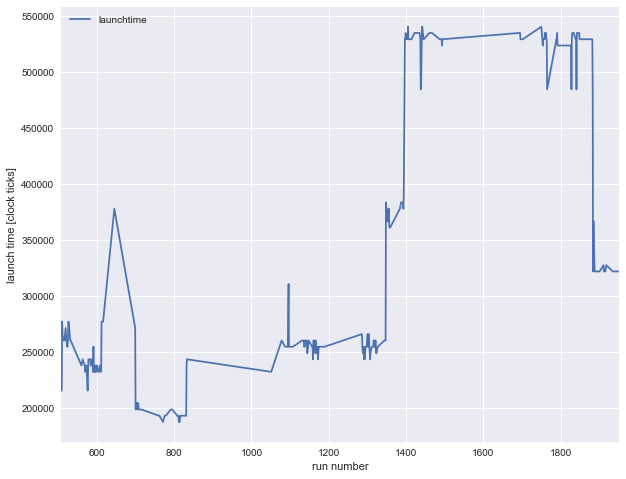

In [15]:
ax = success_df.plot(y='launchtime')
ax.set_xlabel('run number')
ax.set_ylabel('launch time [clock ticks]')

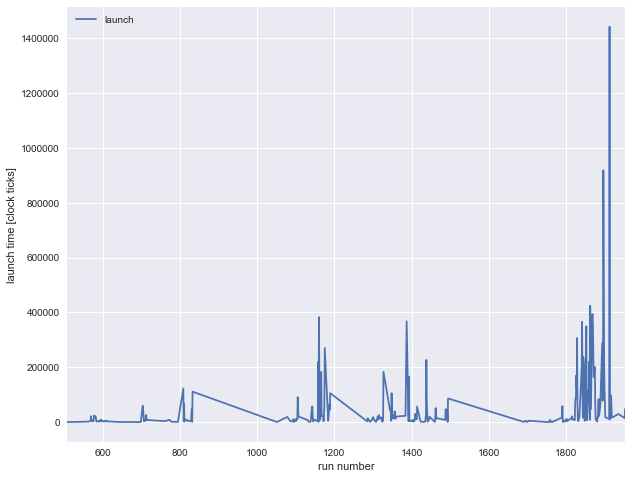

In [16]:
ax = success_df.plot(y='launch')
ax.set_xlabel('run number')
ax.set_ylabel('launch time [clock ticks]')

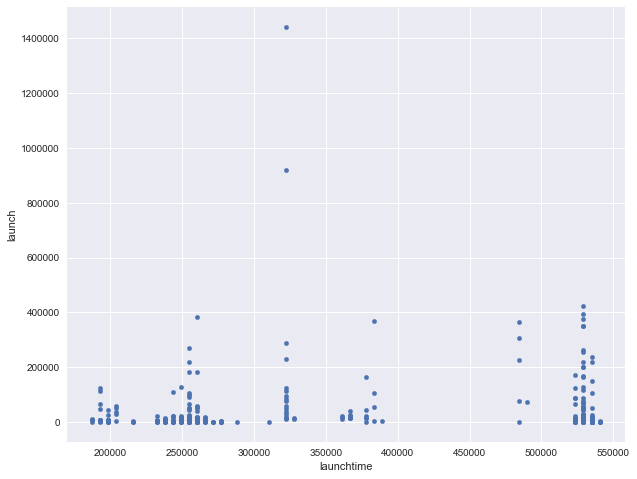

In [17]:
success_df.plot(x='launchtime', y='launch', kind='scatter')

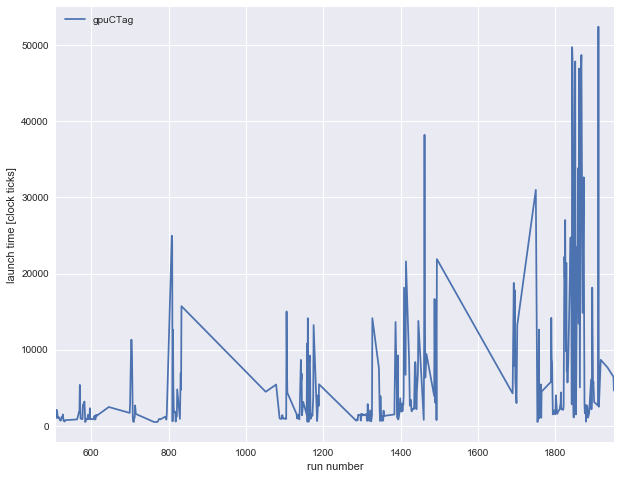

In [18]:
ax = success_df.plot(y='gpuCTag')
ax.set_xlabel('run number')
ax.set_ylabel('launch time [clock ticks]')

In [19]:
success_df.sort_values('launch').tail()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
1160,260400,383019.0,14130,11434,1.20491,14.0,17.0,-1,143.002438,123.672587,27.106794,0.809200,runs 1100 through 1400
1868,529200,394039.0,48678,18924,3.23355,12.0,19.0,-1,126.259635,116.758532,8.094807,0.388759,runs 1700 through 2000
1862,529200,424532.0,46899,21326,2.56393,12.0,19.0,-1,126.259635,116.538679,9.052048,0.454722,runs 1700 through 2000
1896,322000,918650.0,18150,9960,0.00000,12.0,19.0,-1,127.859885,115.433390,50.614325,0.548760,runs 1700 through 2000
1912,322000,1442750.0,52395,18834,1.08573,12.0,19.0,-1,131.466570,119.080842,27.536024,0.359462,runs 1700 through 2000


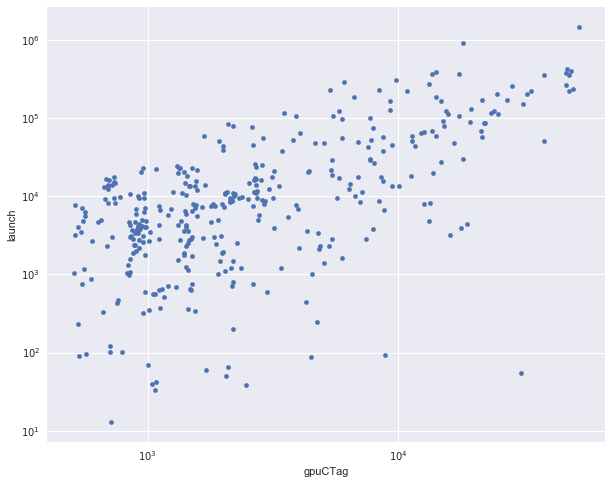

In [20]:
success_df.plot('gpuCTag', 'launch', kind='scatter', loglog=True, label='run period', legend=False)

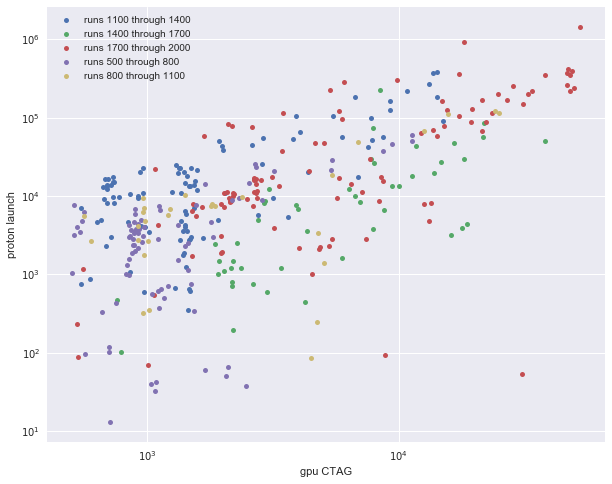

In [21]:
fig, ax = plt.subplots()
groups = success_df.groupby('run period')
for name, group in groups:
    ax.plot(group.gpuCTag, group.launch, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('gpu CTAG')
ax.set_ylabel('proton launch')

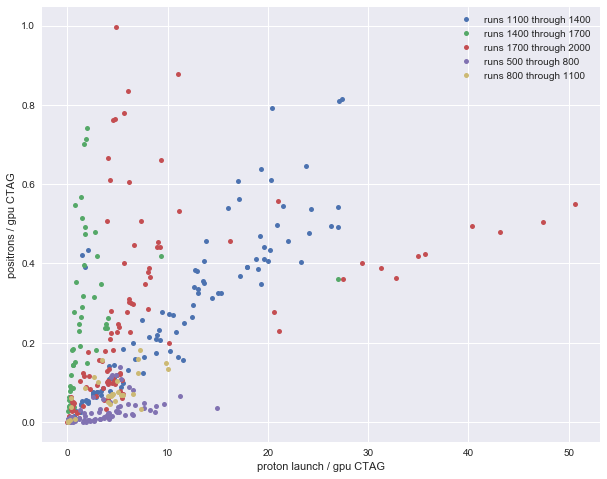

In [22]:
fig, ax = plt.subplots()
groups = success_df.groupby('run period')
for name, group in groups:
    ax.plot(group.normedLaunch, group.normedPositrons, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel('proton launch / gpu CTAG')
ax.set_ylabel('positrons / gpu CTAG')

## do the same but cut out runs where calo 12 was going nuts

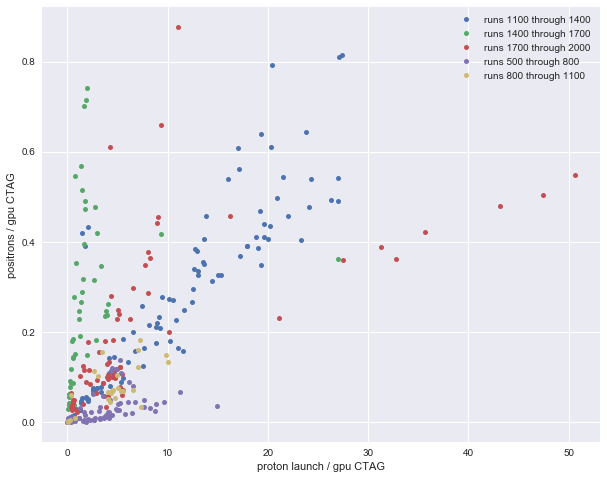

In [23]:
fig, ax = plt.subplots()
groups = success_df.loc[success_df['calo12ratio'] < 3].groupby('run period')
for name, group in groups:
    ax.plot(group.normedLaunch, group.normedPositrons, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel('proton launch / gpu CTAG')
ax.set_ylabel('positrons / gpu CTAG')

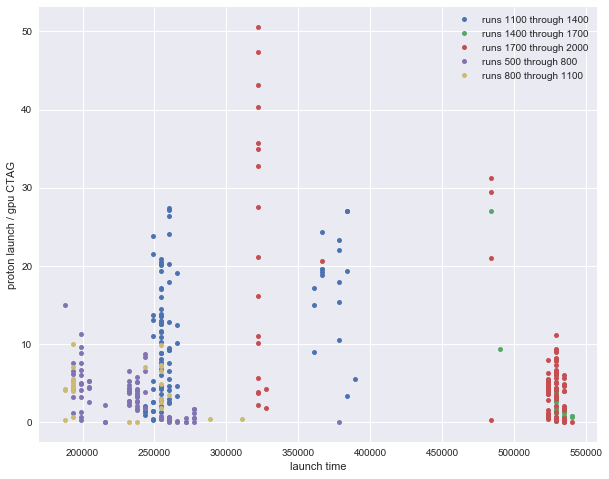

In [24]:
fig, ax = plt.subplots()
groups = success_df.groupby('run period')
for name, group in groups:
    ax.plot(group.launchtime, group.normedLaunch, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel('launch time')
ax.set_ylabel('proton launch / gpu CTAG')

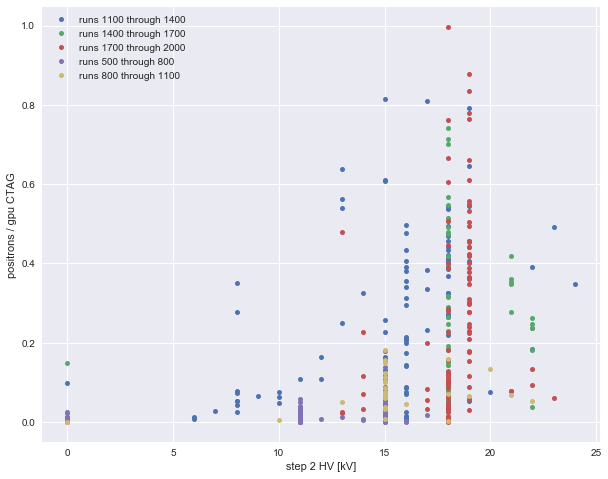

In [25]:
fig, ax = plt.subplots()
groups = success_df.groupby('run period')
for name, group in groups:
    ax.plot(group['step 2 HV'], group.normedPositrons, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel('step 2 HV [kV]')
ax.set_ylabel('positrons / gpu CTAG')

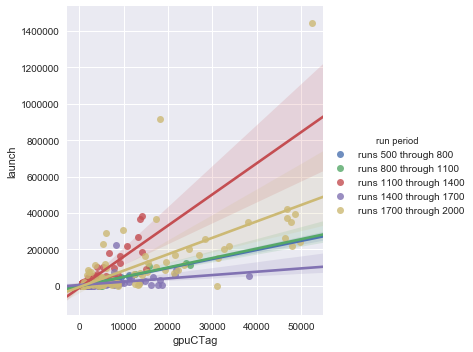

In [26]:
sns.lmplot('gpuCTag', 'launch',success_df,'run period')

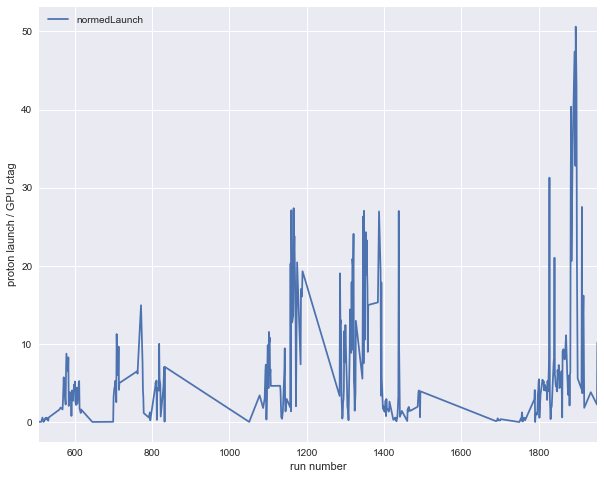

In [27]:
ax = success_df.plot(y='normedLaunch')
ax.set_xlabel('run number')
ax.set_ylabel('proton launch / GPU ctag')

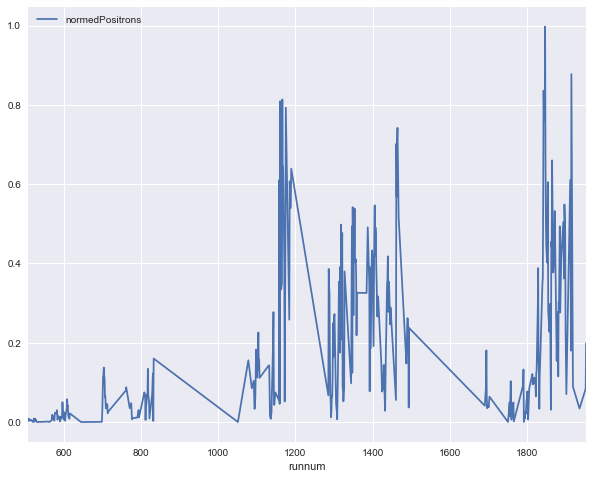

In [28]:
success_df.plot(y='normedPositrons')

In [29]:
success_df.sort_values('normedPositrons').tail()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
1160,260400,383019.0,14130,11434,1.20491,14.0,17.0,-1,143.002438,123.672587,27.106794,0.809200,runs 1100 through 1400
1166,260400,182832.0,6678,5434,1.30083,12.0,15.0,-1,143.002438,123.081541,27.378257,0.813717,runs 1100 through 1400
1842,534800,104709.0,17399,14541,52.45870,12.0,19.0,-1,128.849645,116.655387,6.018104,0.835738,runs 1700 through 2000
1914,322000,38060.0,3436,3015,1.04091,12.0,19.0,-1,131.466570,120.091538,11.076834,0.877474,runs 1700 through 2000
1846,534800,150926.0,31294,31205,96.94010,11.0,18.0,-1,131.538362,116.751266,4.822841,0.997156,runs 1700 through 2000


In [30]:
success_df.loc[[1462]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
1462,534800,51189.0,38197,21698,1.16925,11.0,18.0,y,167.675154,125.502729,1.340131,0.568055,runs 1400 through 1700


In [31]:
success_df.loc[[1912]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
1912,322000,1442750.0,52395,18834,1.08573,12.0,19.0,-1,131.46657,119.080842,27.536024,0.359462,runs 1700 through 2000


In [32]:
success_df.loc[[1848]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
1848,534800,4328.0,1103,559,42.5885,11.0,18.0,-1,140.440941,120.598333,3.923844,0.5068,runs 1700 through 2000


In [33]:
success_df.loc[success_df['step 2 HV'] < 6].sort_values('normedPositrons').tail()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period
runnum,,,,,,,,,,,,,
592,232400,3621.0,897,12,1.76923,0.0,0.0,0,123.212961,106.350000,4.036789,0.013378,runs 500 through 800
714,198800,8918.0,2167,48,0.92000,0.0,0.0,-1,122.586400,106.350000,4.115367,0.022150,runs 500 through 800
715,198800,7792.0,1561,40,1.15000,0.0,0.0,-1,122.586400,106.350000,4.991672,0.025625,runs 500 through 800
1344,260400,41987.0,7566,740,1.35865,0.0,0.0,-1,136.117425,120.549431,5.549432,0.097806,runs 1100 through 1400
1487,529200,7678.0,3916,578,1.78889,0.0,0.0,-1,131.820287,118.569394,1.960674,0.147600,runs 1400 through 1700


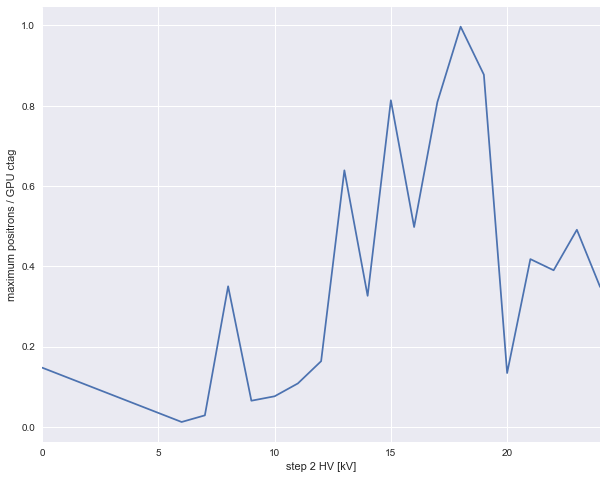

In [34]:
ax = success_df.groupby('step 2 HV').agg('max').plot(y='normedPositrons', legend=False)
ax.set_ylabel('maximum positrons / GPU ctag')
ax.set_xlabel('step 2 HV [kV]')

In [35]:
success_df['step 2 - step 1'] = success_df['step 2 HV'] - success_df['step 1 HV']

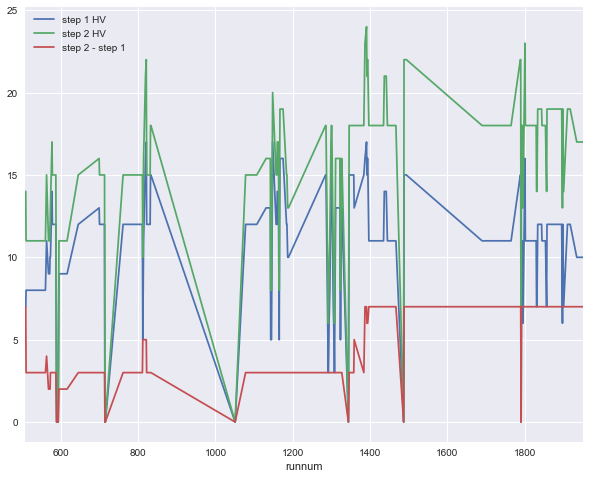

In [36]:
success_df.plot(y=['step 1 HV', 'step 2 HV', 'step 2 - step 1'])

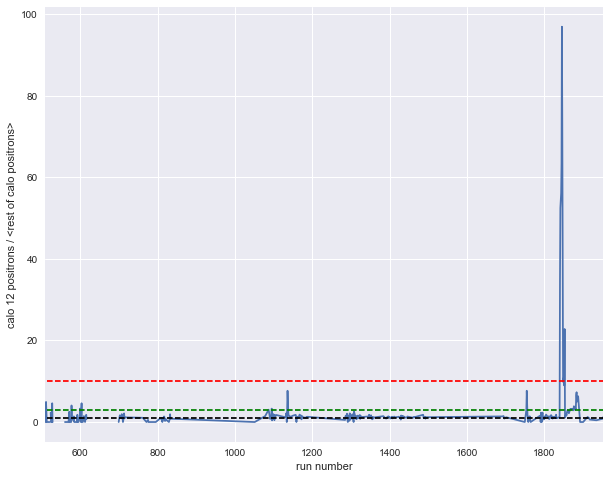

In [37]:
ax = success_df.plot(y='calo12ratio', legend=False)
ax.plot([0,2000],[10,10],'r--')
ax.plot([0,2000],[3,3],'g--')
ax.plot([0,2000],[1,1],'k--')
ax.set_xlabel('run number')
ax.set_ylabel('calo 12 positrons / <rest of calo positrons>')

## group by launch time

In [38]:
success_df['launchgroup'] = 'None'
launch_ranges = [(0,250000), (250000,300000), (300000,400000), (400000, 560000)]
for launch_r in launch_ranges:
    success_df.loc[(success_df.launchtime >= launch_r[0]) & (success_df.launchtime < launch_r[1]), 
                   'launchgroup'] = '{0:.0f} to {1:.0f} $\mu$s'.format(launch_r[0]*1.25/1000, launch_r[1]*1.25/1000)

In [39]:
success_df.tail()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period,step 2 - step 1,launchgroup
runnum,,,,,,,,,,,,,,,
1916,322000,96701.0,5975,2733,1.018550,12.0,19.0,-1,131.466570,119.656229,16.184268,0.457406,runs 1700 through 2000,7.0,375 to 500 $\mu$s
1918,327600,15790.0,8667,774,0.604468,12.0,19.0,-1,131.466570,122.106149,1.821853,0.089304,runs 1700 through 2000,7.0,375 to 500 $\mu$s
1935,322000,29413.0,7703,262,0.430712,10.0,17.0,-1,128.250035,111.588333,3.818382,0.034013,runs 1700 through 2000,7.0,375 to 500 $\mu$s
1951,322000,14388.0,6437,540,0.787072,10.0,17.0,n,106.653608,113.978738,2.235203,0.083890,runs 1700 through 2000,7.0,375 to 500 $\mu$s
1952,322000,47170.0,4640,922,1.157720,10.0,17.0,n,135.667757,116.367906,10.165948,0.198707,runs 1700 through 2000,7.0,375 to 500 $\mu$s


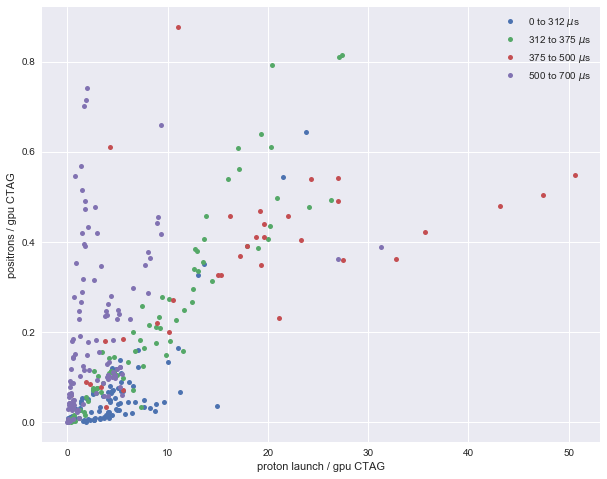

In [40]:
fig, ax = plt.subplots()
groups = success_df.loc[success_df['calo12ratio'] < 3].groupby('launchgroup')
for name, group in groups:
    ax.plot(group.normedLaunch, group.normedPositrons, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel('proton launch / gpu CTAG')
ax.set_ylabel('positrons / gpu CTAG')

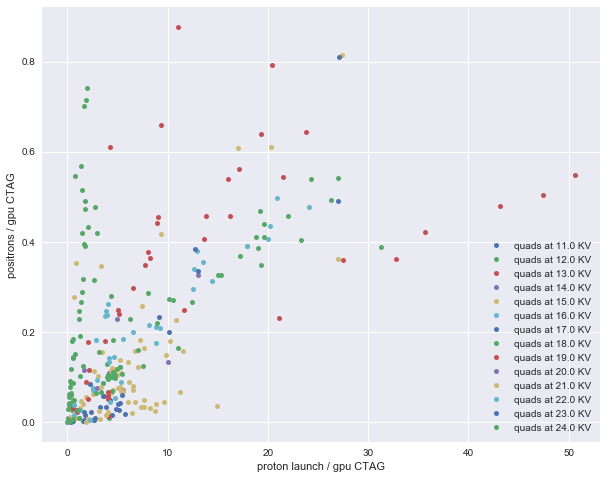

In [41]:
fig, ax = plt.subplots()
groups = success_df.loc[success_df['calo12ratio'] < 3].groupby('step 2 HV')
for name, group in groups:
    if (float(name) > 10.0):
        ax.plot(group.normedLaunch, group.normedPositrons, marker='o', linestyle='',
                ms=5, label='quads at {} KV'.format(name))
ax.legend()
ax.set_xlabel('proton launch / gpu CTAG')
ax.set_ylabel('positrons / gpu CTAG')

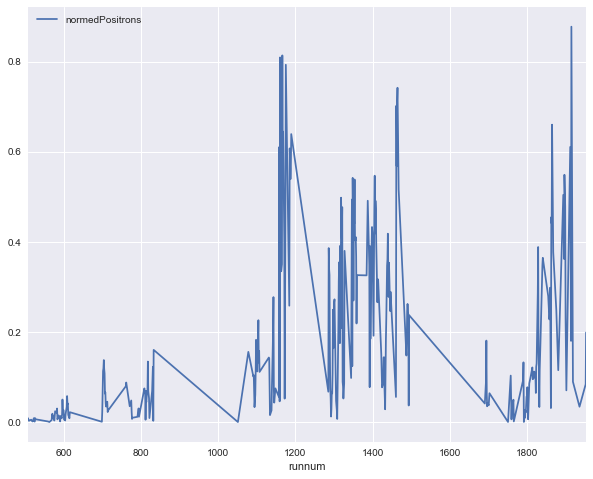

In [42]:
groups = success_df.loc[success_df['calo12ratio'] < 3].plot(y='normedPositrons')

In [43]:
piv = pd.pivot_table(success_df.loc[success_df['calo12ratio'] < 3], index='step 2 HV', columns='run period', values='normedPositrons', margins=True)

In [44]:
piv

run period,runs 1100 through 1400,runs 1400 through 1700,runs 1700 through 2000,runs 500 through 800,runs 800 through 1100,All
step 2 HV,,,,,,
0.0,0.097806,0.147600,0.000227,0.013173,0.000000,0.030713
6.0,0.009573,NaN,NaN,NaN,NaN,0.009573
7.0,0.028772,NaN,NaN,NaN,NaN,0.028772
8.0,0.119151,NaN,NaN,NaN,NaN,0.119151
9.0,0.065233,NaN,NaN,NaN,NaN,0.065233
10.0,0.062392,NaN,NaN,NaN,0.005160,0.048084
11.0,0.108298,NaN,NaN,0.015447,NaN,0.018348
12.0,0.136555,NaN,NaN,0.008247,NaN,0.093786
13.0,0.497379,NaN,0.175350,0.012903,0.050105,0.286508


In [45]:
success_df = success_df.loc[success_df['calo12ratio'] < 3]

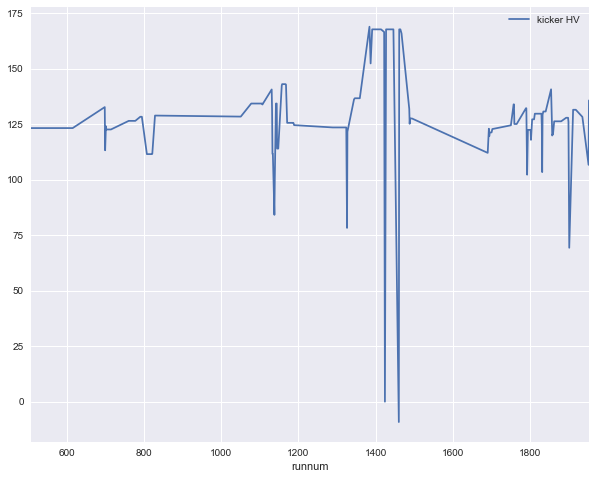

In [46]:
success_df.plot(y='kicker HV')

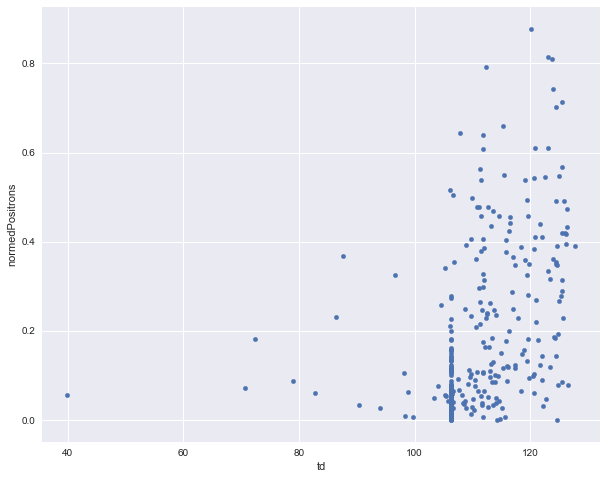

In [47]:
success_df.plot(x='td', y='normedPositrons', kind='scatter')

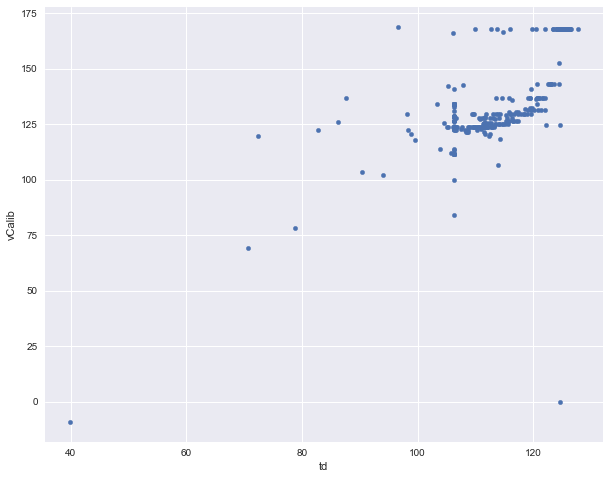

In [48]:
ax = success_df.plot(x='td', y='kicker HV', kind='scatter')
ax.set_xlabel('td')
ax.set_ylabel('vCalib')

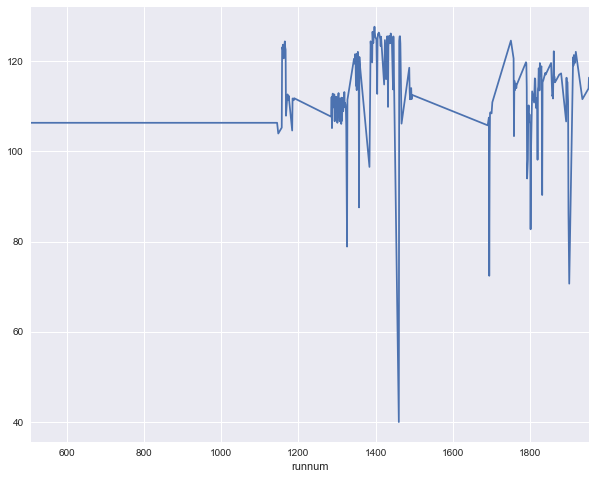

In [49]:
ax = success_df.plot(y='td', legend=False)

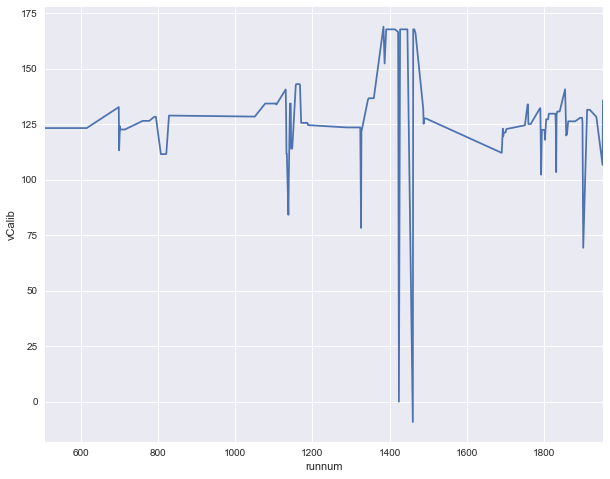

In [50]:
ax = success_df.plot(y='kicker HV', legend=False)
ax.set_ylabel('vCalib')

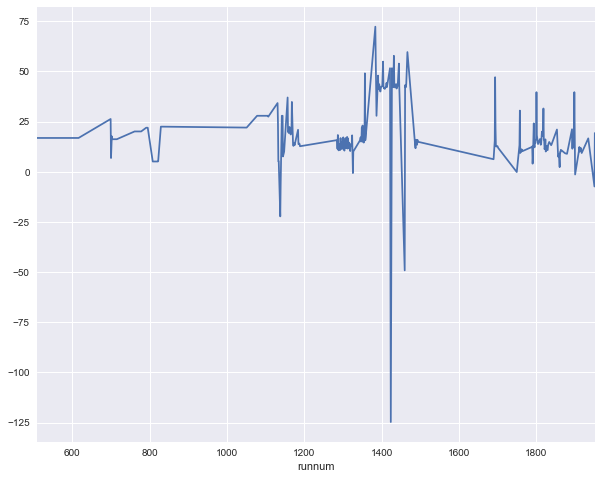

In [51]:
(success_df['kicker HV'] - success_df['td']).plot()

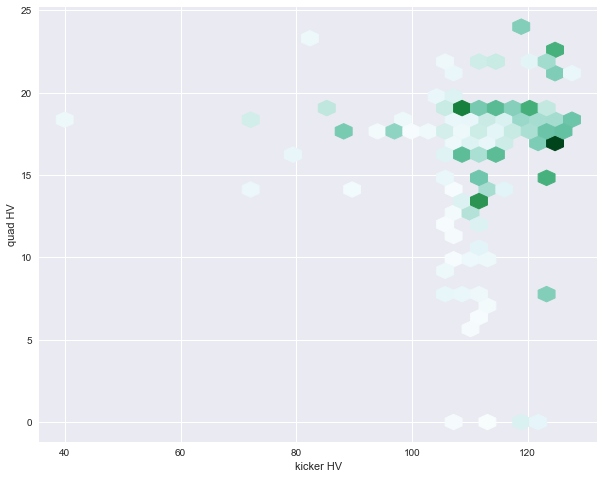

In [52]:
ax = success_df.plot.hexbin(x='td', y='step 2 HV', C='normedPositrons', 
                            reduce_C_function=np.mean, gridsize=30, colorbar=False)
ax.set_xlabel('kicker HV')
ax.set_ylabel('quad HV')

In [53]:
success_df.sort_values('normedPositrons').tail()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period,step 2 - step 1,launchgroup
runnum,,,,,,,,,,,,,,,
1464,534800,12254.0,6342,4705,1.24491,11.0,18.0,-1,167.675154,123.930234,1.932198,0.741880,runs 1400 through 1700,7.0,500 to 700 $\mu$s
1175,254800,270466.0,13229,10490,1.20567,16.0,19.0,-1,125.573083,112.337960,20.444932,0.792955,runs 1100 through 1400,3.0,312 to 375 $\mu$s
1160,260400,383019.0,14130,11434,1.20491,14.0,17.0,-1,143.002438,123.672587,27.106794,0.809200,runs 1100 through 1400,3.0,312 to 375 $\mu$s
1166,260400,182832.0,6678,5434,1.30083,12.0,15.0,-1,143.002438,123.081541,27.378257,0.813717,runs 1100 through 1400,3.0,312 to 375 $\mu$s
1914,322000,38060.0,3436,3015,1.04091,12.0,19.0,-1,131.466570,120.091538,11.076834,0.877474,runs 1700 through 2000,7.0,375 to 500 $\mu$s


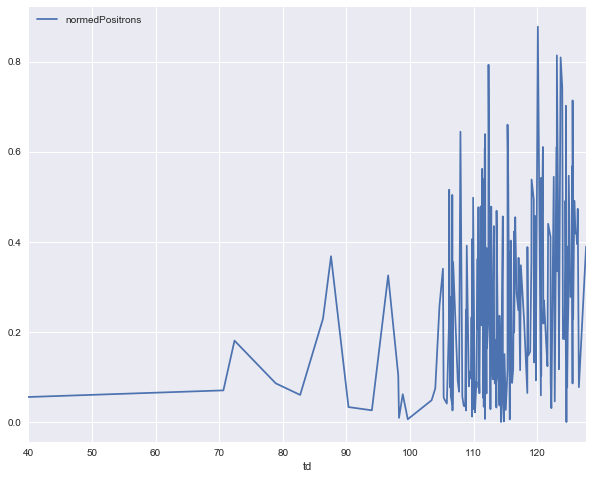

In [54]:
success_df.groupby('td').agg(np.max).plot(y='normedPositrons')

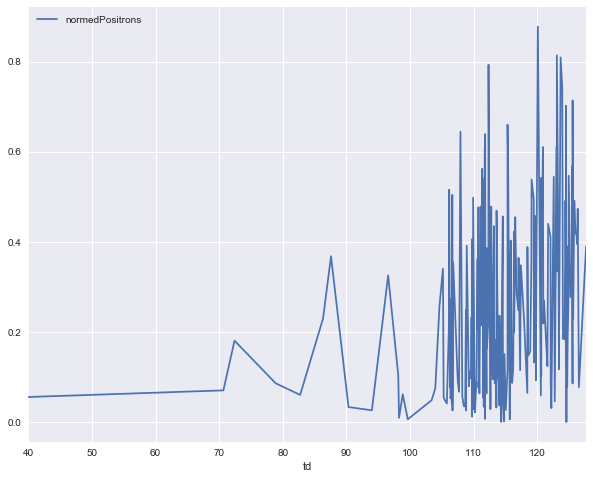

In [55]:
success_df.groupby('td').agg(np.mean).plot(y='normedPositrons')

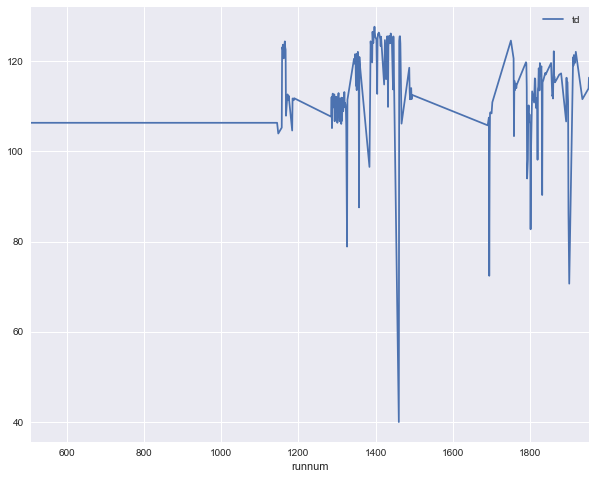

In [56]:
success_df.plot(y='td')

In [57]:
success_df.head()

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period,step 2 - step 1,launchgroup
runnum,,,,,,,,,,,,,,,
508,215600,33.0,1071,9,0.0,7.0,14.0,-1,123.212961,106.35,0.030812,0.008403,runs 500 through 800,7.0,0 to 312 $\mu$s
509,215600,65.0,2093,10,0.0,7.0,14.0,-1,123.212961,106.35,0.031056,0.004778,runs 500 through 800,7.0,0 to 312 $\mu$s
510,277200,42.0,1080,3,0.0,8.0,11.0,-1,123.212961,106.35,0.038889,0.002778,runs 500 through 800,3.0,312 to 375 $\mu$s
513,260400,40.0,1040,4,0.0,8.0,11.0,-1,123.212961,106.35,0.038462,0.003846,runs 500 through 800,3.0,312 to 375 $\mu$s
516,260400,651.0,1139,6,0.0,8.0,11.0,-1,123.212961,106.35,0.571554,0.005268,runs 500 through 800,3.0,312 to 375 $\mu$s


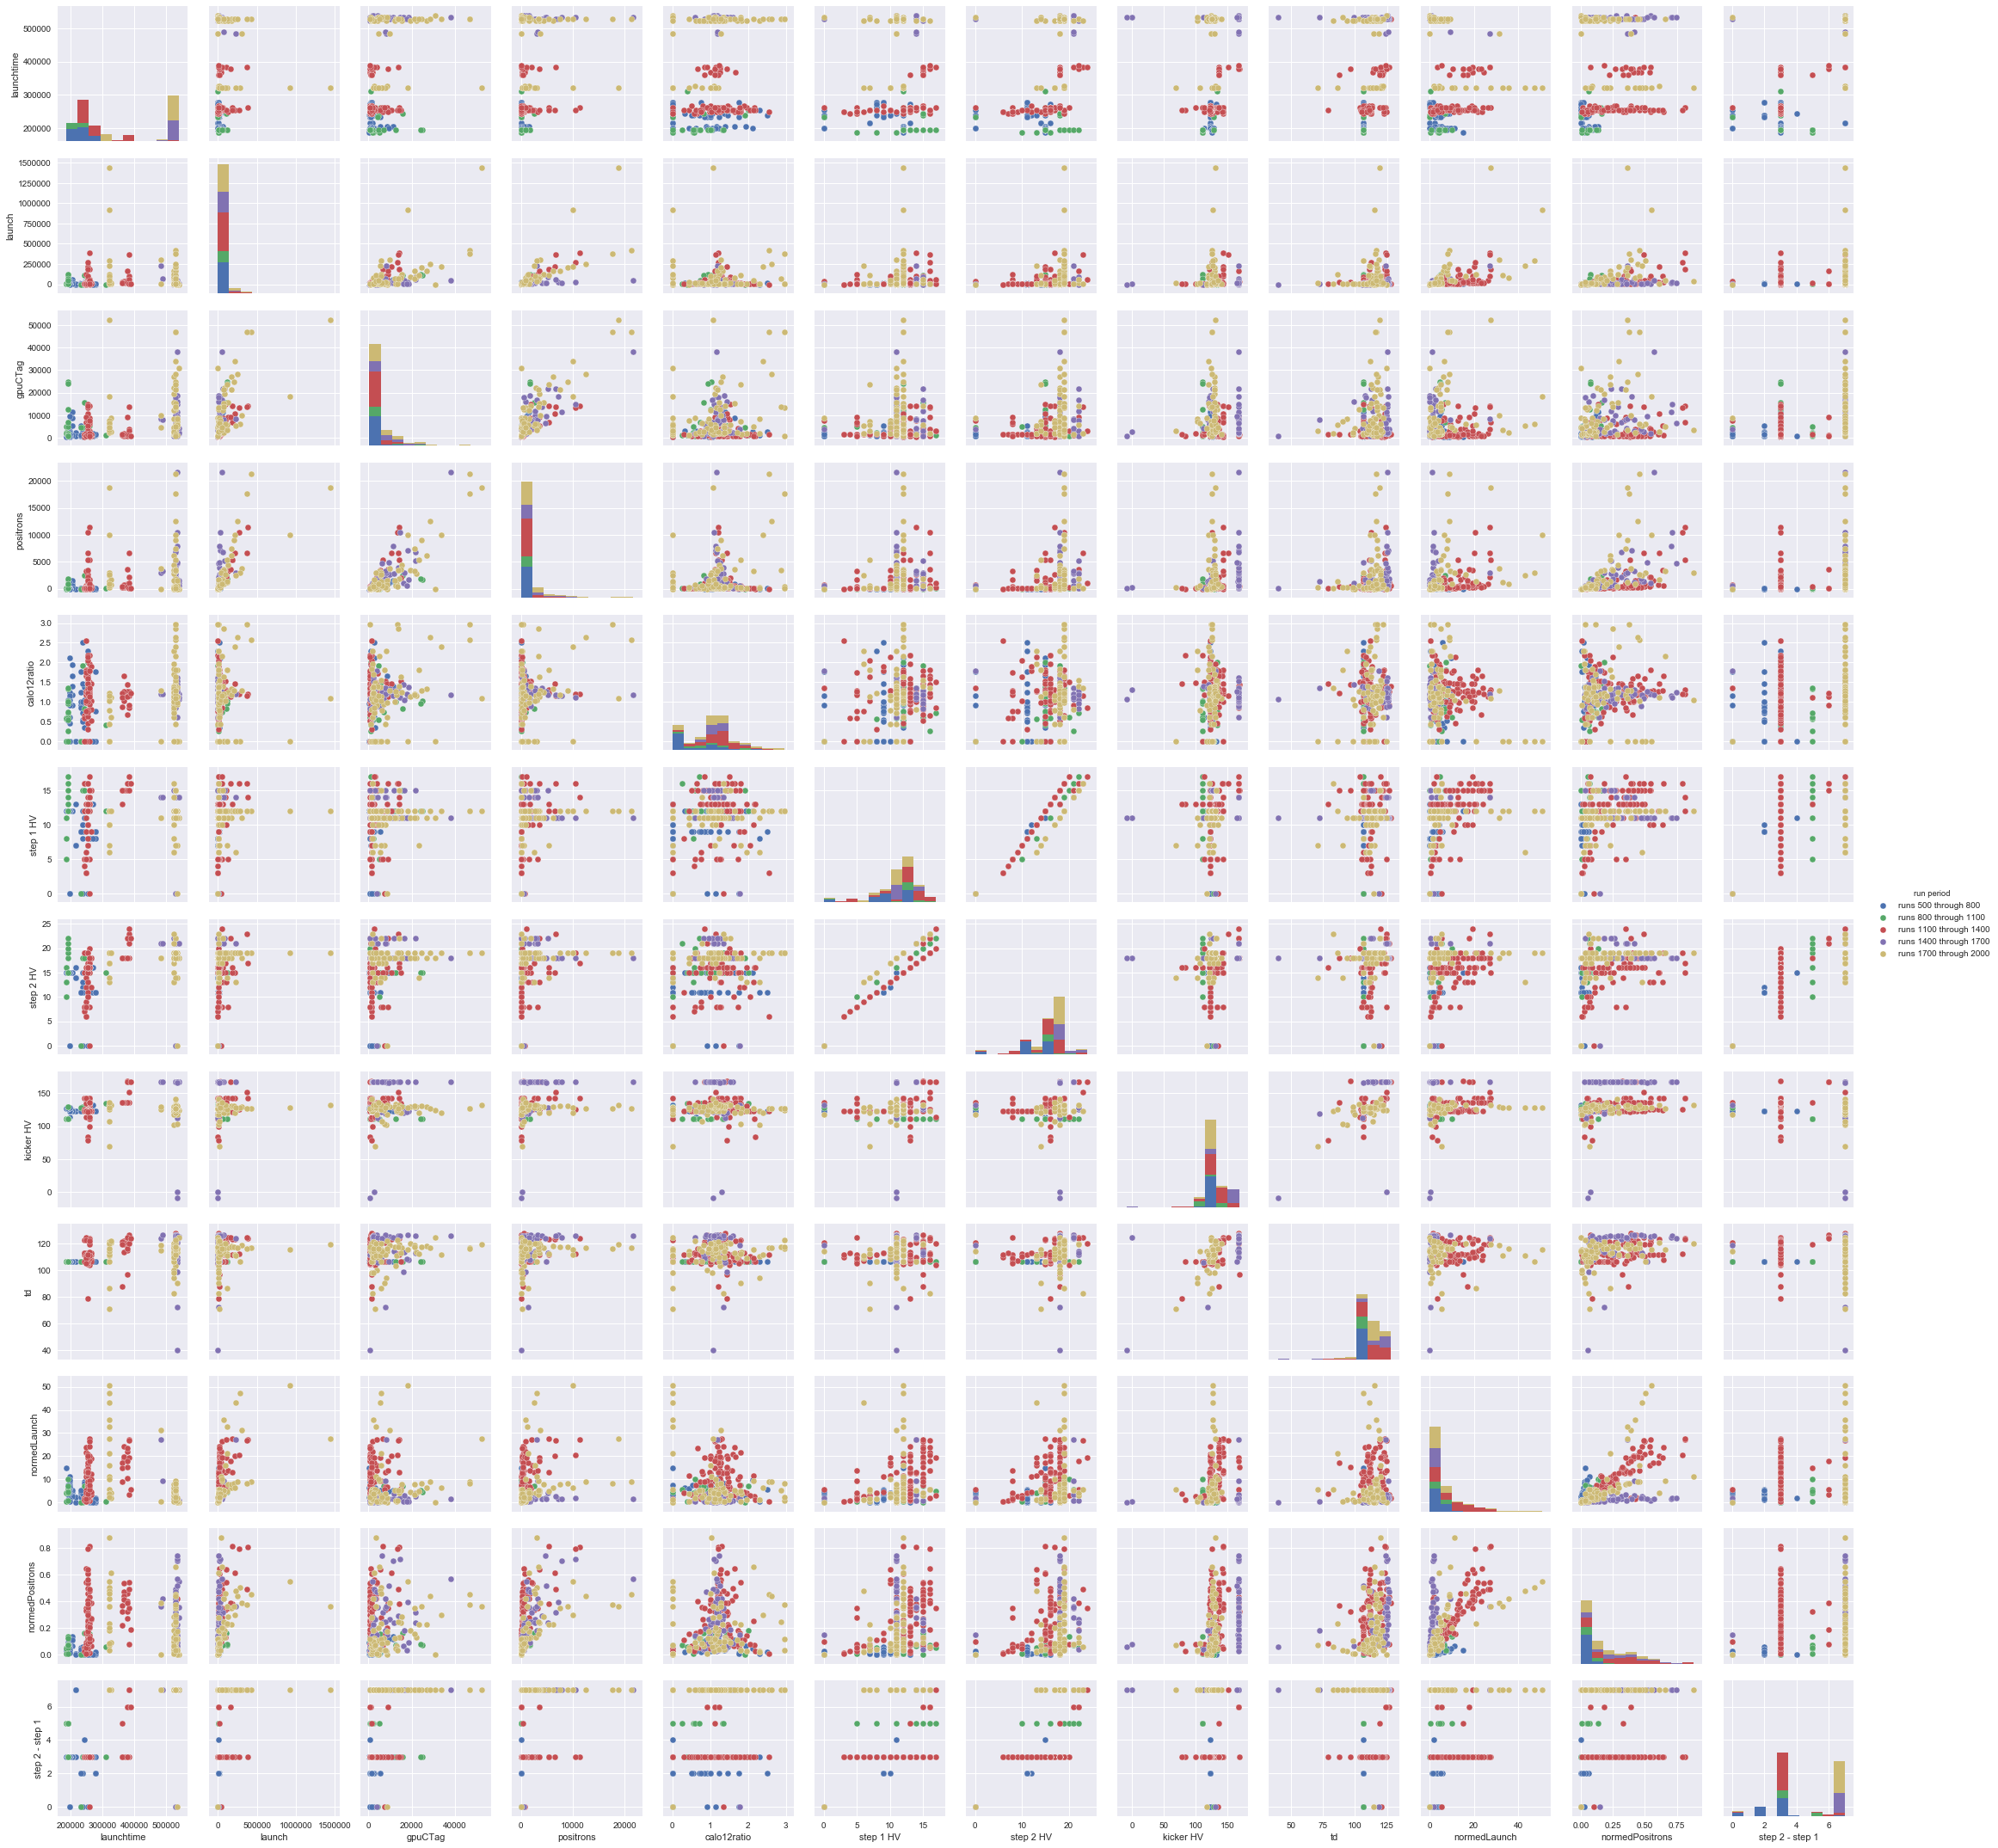

In [58]:
sns.pairplot(success_df, hue='run period')

In [59]:
success_df.positrons.sum()

413321

In [60]:
success_df.index

Int64Index([ 508,  509,  510,  513,  516,  519,  520,  523,  524,  525,
            ...
            1901, 1911, 1912, 1913, 1914, 1916, 1918, 1935, 1951, 1952],
           dtype='int64', name='runnum', length=324)

In [61]:
success_df.sort_values('positrons')[['launchtime','launch','positrons','step 2 HV', 'kicker HV', 'normedPositrons']].tail()

,launchtime,launch,positrons,step 2 HV,kicker HV,normedPositrons
runnum,,,,,,
1863,529200,254710.0,12522,19.0,126.259635,0.440791
1867,529200,375290.0,17645,19.0,126.259635,0.377119
1912,322000,1442750.0,18834,19.0,131.466570,0.359462
1862,529200,424532.0,21326,19.0,126.259635,0.454722
1462,534800,51189.0,21698,18.0,167.675154,0.568055


In [62]:
success_df.loc[[1462]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period,step 2 - step 1,launchgroup
runnum,,,,,,,,,,,,,,,
1462,534800,51189.0,38197,21698,1.16925,11.0,18.0,y,167.675154,125.502729,1.340131,0.568055,runs 1400 through 1700,7.0,500 to 700 $\mu$s


In [63]:
success_df.loc[[1862]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td,normedLaunch,normedPositrons,run period,step 2 - step 1,launchgroup
runnum,,,,,,,,,,,,,,,
1862,529200,424532.0,46899,21326,2.56393,12.0,19.0,-1,126.259635,116.538679,9.052048,0.454722,runs 1700 through 2000,7.0,500 to 700 $\mu$s


In [64]:
df.loc[[1462,1862,1874,1912,1915,1879]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
1462,534800,51189.0,38197,21698,1.16925,11.0,18.0,y,167.675154,125.502729
1862,529200,424532.0,46899,21326,2.56393,12.0,19.0,-1,126.259635,116.538679
1874,529200,200247.0,32623,10133,3.10727,12.0,19.0,-1,126.259635,115.605232
1912,322000,1442750.0,52395,18834,1.08573,12.0,19.0,-1,131.466570,119.080842
1915,333200,86449.0,9949,25072,1.00191,12.0,19.0,-1,131.466570,120.911380
1879,529200,15904.0,2665,740,3.46307,12.0,19.0,-1,126.259635,104.280224


In [65]:
df.loc[[770]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
770,187600,4959.0,421,11,2.3,12.0,15.0,-1,126.460974,106.35


In [66]:
df.loc[[1851]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
1851,529200,261769.0,46462,18679,10.9348,11.0,18.0,-1,139.23501,121.394295


In [67]:
df.loc[[1839]]

,launchtime,launch,gpuCTag,positrons,calo12ratio,step 1 HV,step 2 HV,scrapping,kicker HV,td
runnum,,,,,,,,,,
1839,529200,167249.0,21499,7483,1.18524,12.0,19.0,-1,130.679321,117.422447
